In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
from netCDF4 import Dataset
import open_xarray as ox

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

ds1=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m/eurec4a.default.0000000.nc')
ds2=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_2/eurec4a.default.0000000.nc')
ds3=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_3/eurec4a.default.0000000.nc')
ds4=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_4/eurec4a.default.0000000.nc')
ds5=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_jan31/eurec4a.default.0000000.nc')
ds6=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_jan31_2/eurec4a.default.0000000.nc')
ds7=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_feb1/eurec4a.default.0000000.nc')
ds8=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Eurec4a_Eulerian/Feb2nd_1150_2300/eurec4a.default.0000000.nc')

ds1_smooth=ds1.rolling(time=12).mean()
ds2_smooth=ds2.rolling(time=12).mean()
ds3_smooth=ds3.rolling(time=12).mean()
ds4_smooth=ds4.rolling(time=12).mean()
ds5_smooth=ds5.rolling(time=12).mean()
ds6_smooth=ds6.rolling(time=12).mean()
ds7_smooth=ds7.rolling(time=12).mean()

label1='Seed 1'
label2='Seed 2'
label3='Seed 3'
label4='Seed 4'




/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs

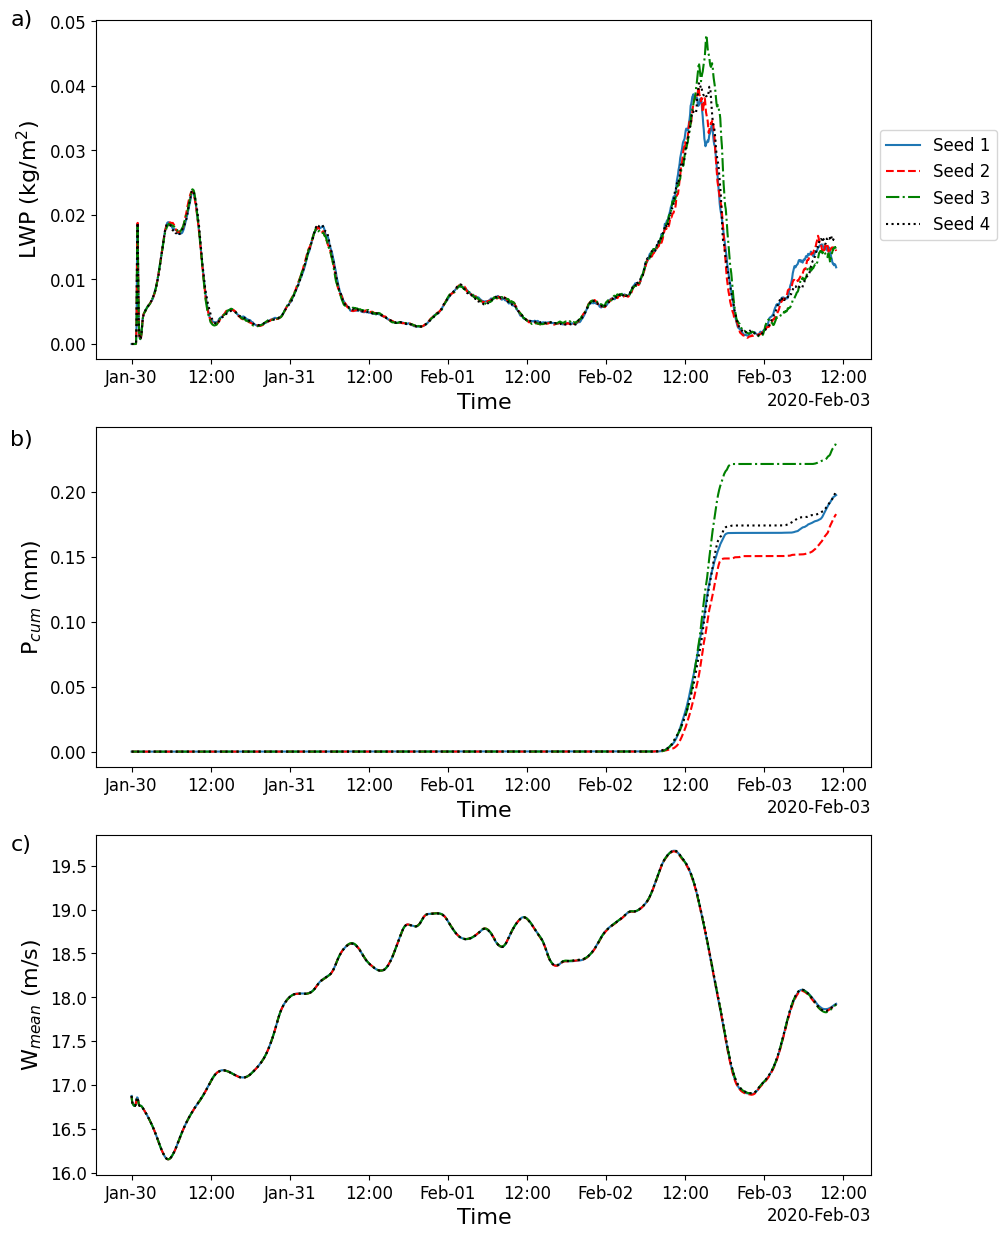

In [14]:
fig, axs = pl.subplots(3, 1, figsize=(10, 15))
pl.subplot(311)
ds1.ql_path.plot.line(x='time',label='Seed 1')
ds2.ql_path.plot.line('r--',x='time',label='Seed 2')
ds3.ql_path.plot.line('g-.',x='time',label='Seed 3')
ds4.ql_path.plot.line('k:',x='time',label='Seed 4')
pl.ylabel(r'LWP (kg/m$^{2}$)')
#pl.xticks([])
#pl.xlabel('')
#pl.show()

pl.subplot(312)
(ds1['rr']*300).cumsum().plot.line(x='time',label=label1)
(ds2['rr']*300).cumsum().plot.line('r--',x='time',label=label2)
(ds3['rr']*300).cumsum().plot.line('g-.',x='time',label=label3)
(ds4['rr']*300).cumsum().plot.line('k:',x='time',label=label4)
pl.ylabel(r'P$_{cum}$ (mm)')
#pl.show()
#pl.xticks([])
#pl.xlabel('')

pl.subplot(313)
(ds1.thl.sel(z=3200)-ds1.thl.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line(x='time',label=label1)
(ds2.thl.sel(z=3200)-ds2.thl.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('r--',x='time',label=label2)
(ds3.thl.sel(z=3200)-ds3.thl.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('g-.',x='time',label=label3)
(ds4.thl.sel(z=3200)-ds4.thl.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('k:',x='time',label='Seed 4')
pl.legend(loc='upper left',bbox_to_anchor=(1, 3.1))
pl.ylabel(r'W$_{mean}$ (m/s)')
pl.figtext(0.05, 0.88, 'a)', ha='center', va='center', fontsize=16)
pl.figtext(0.05, 0.6, 'b)', ha='center', va='center', fontsize=16)
pl.figtext(0.05, 0.33, 'c)', ha='center', va='center', fontsize=16)

pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/Ensemble_Runs_Feb2nd.jpg',dpi=300, bbox_inches='tight')

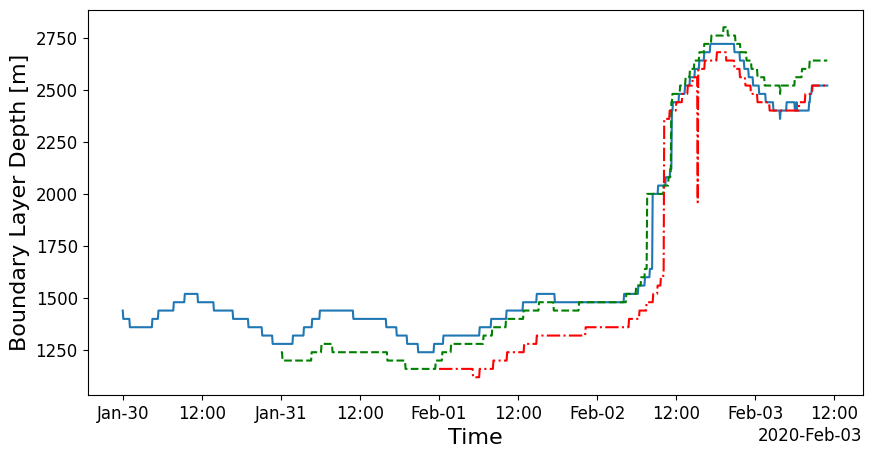

In [39]:
#find end of inversion 
def find_inversion(ds):
    ds['z_inv_end']=ds['zi'].copy()
    ds['z_inv_start']=ds['zi'].copy()
    for i in range(len(ds['time'])):
        for j in range(len(ds['z'])):
            if ds['T'][i,j]>ds['T'][i,j-1] and ds['T'][i,j-1]<ds['T'][i,j-2] and ds['z'][j]>1000:
                ds['z_inv_start'][i]=ds['z'][j]
            elif ds['T'][i,j]<ds['T'][i,j-1] and ds['T'][i,j-1]>ds['T'][i,j-2] and ds['z'][j]>1000:
                ds['z_inv_end'][i]=ds['z'][j]
                break
    return ds

ds1=find_inversion(ds1)
ds5=find_inversion(ds5)
ds7=find_inversion(ds7)


pl.figure(figsize=(10,5))
ds1['z_inv_end'].plot.line(x='time',label=label1)
ds5['z_inv_end'].plot.line('g--',x='time',label='Seed 5')
ds7['z_inv_end'].plot.line('r-.',x='time',label='Seed 6')

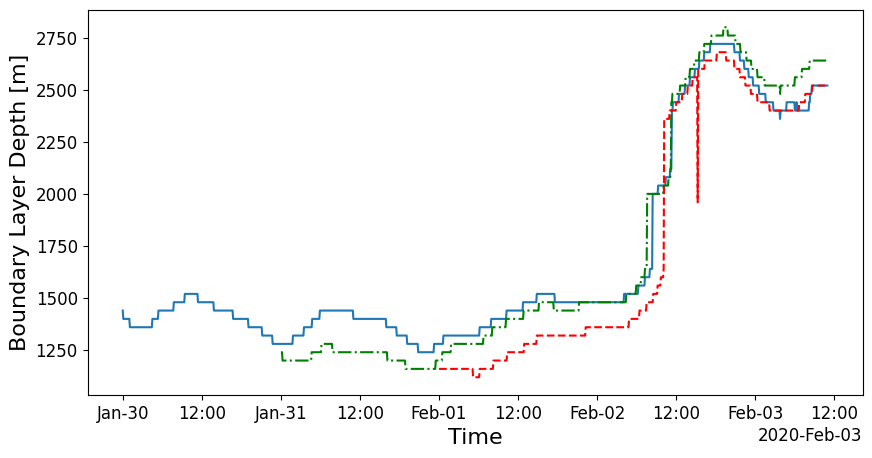

In [64]:
pl.figure(figsize=(10,5))
(ds1['zi']).plot.line(x='time',label=label1)
(ds5['zi']).plot.line('g-.',x='time',label='Seed 5')
(ds7['zi']).plot.line('r--',x='time',label='Seed 6')



In [2]:
def find_cloudbasetop(nc_data,z,cfrac,z_dim):
    nc_data['ql_base']=xr.DataArray(np.zeros(nc_data['time'].size),dims=['time'])
    nc_data['ql_top']=xr.DataArray(np.zeros(nc_data['time'].size),dims=['time'])
    for k in range(0,nc_data['time'].size):
        nc_data['ql_base'].values[k]=nc_data[z].where(nc_data[cfrac].isel(time=k)>0.01).min(dim=z_dim)
        nc_data['ql_top'].values[k]=nc_data[z].where(nc_data[cfrac].isel(time=k)>0.5*max(nc_data[cfrac].isel(time=k))).max(dim=z_dim)
    return nc_data;

def find_max_cloudtop(nc_data,z,ql,z_dim):
    nc_data['ql_base_min']=xr.DataArray(np.zeros(nc_data['time'].size),dims=['time'])
    nc_data['ql_top_max']=xr.DataArray(np.zeros(nc_data['time'].size),dims=['time'])
    for k in range(0,nc_data['time'].size):
        nc_data['ql_top_max'].values[k]=nc_data[z].where((nc_data[ql].isel(time=k))>0).max(dim=z_dim).values
        nc_data['ql_base_min'].values[k]=nc_data[z].where((nc_data[ql].isel(time=k))>0).min(dim=z_dim).values
    return nc_data;

ds1=find_max_cloudtop(ds1,'z','ql','z')
ds5=find_max_cloudtop(ds5,'z','ql','z')
ds7=find_max_cloudtop(ds7,'z','ql','z')

<xarray.DataArray 'ql_top_max' (time: 1284)>
array([  nan,   nan,   nan, ..., 2720., 2640., 2640.])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-03T10:55:00.000000002
running


(0.0, 4000.0)

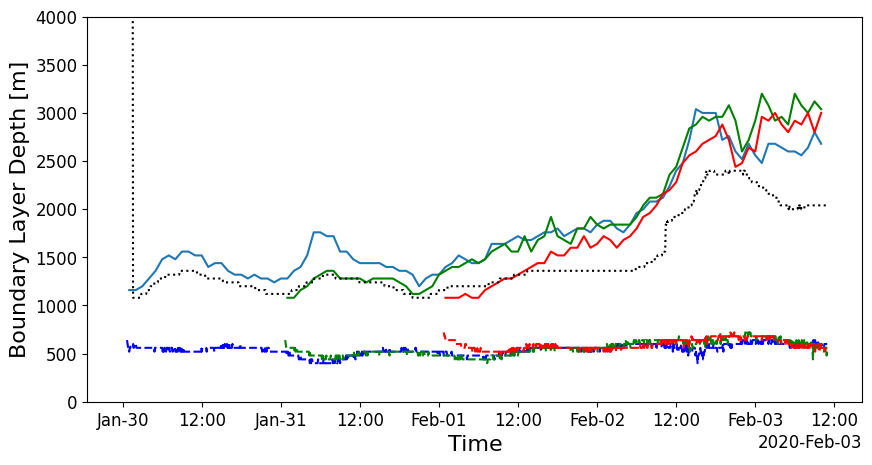

In [4]:
print(ds1['ql_top_max'])
print('running')
pl.figure(figsize=(10,5))
ds1['ql_top_max'].isel(time=slice(None,None,12)).plot.line(x='time',label=label1)
ds5['ql_top_max'].isel(time=slice(None,None,12)).plot.line('g-',x='time',label='Seed 5')
ds7['ql_top_max'].isel(time=slice(None,None,12)).plot.line('r-',x='time',label='Seed 6')
ds1['ql_base_min'].plot.line('b--',x='time',label=label1)
ds5['ql_base_min'].plot.line('g--',x='time',label='Seed 5')
ds7['ql_base_min'].plot.line('r--',x='time',label='Seed 6')
ds1['zi'].plot.line('k:',x='time',label=label1)
pl.ylim(0,4000)

Text(0.05, 0.3, 'd)')

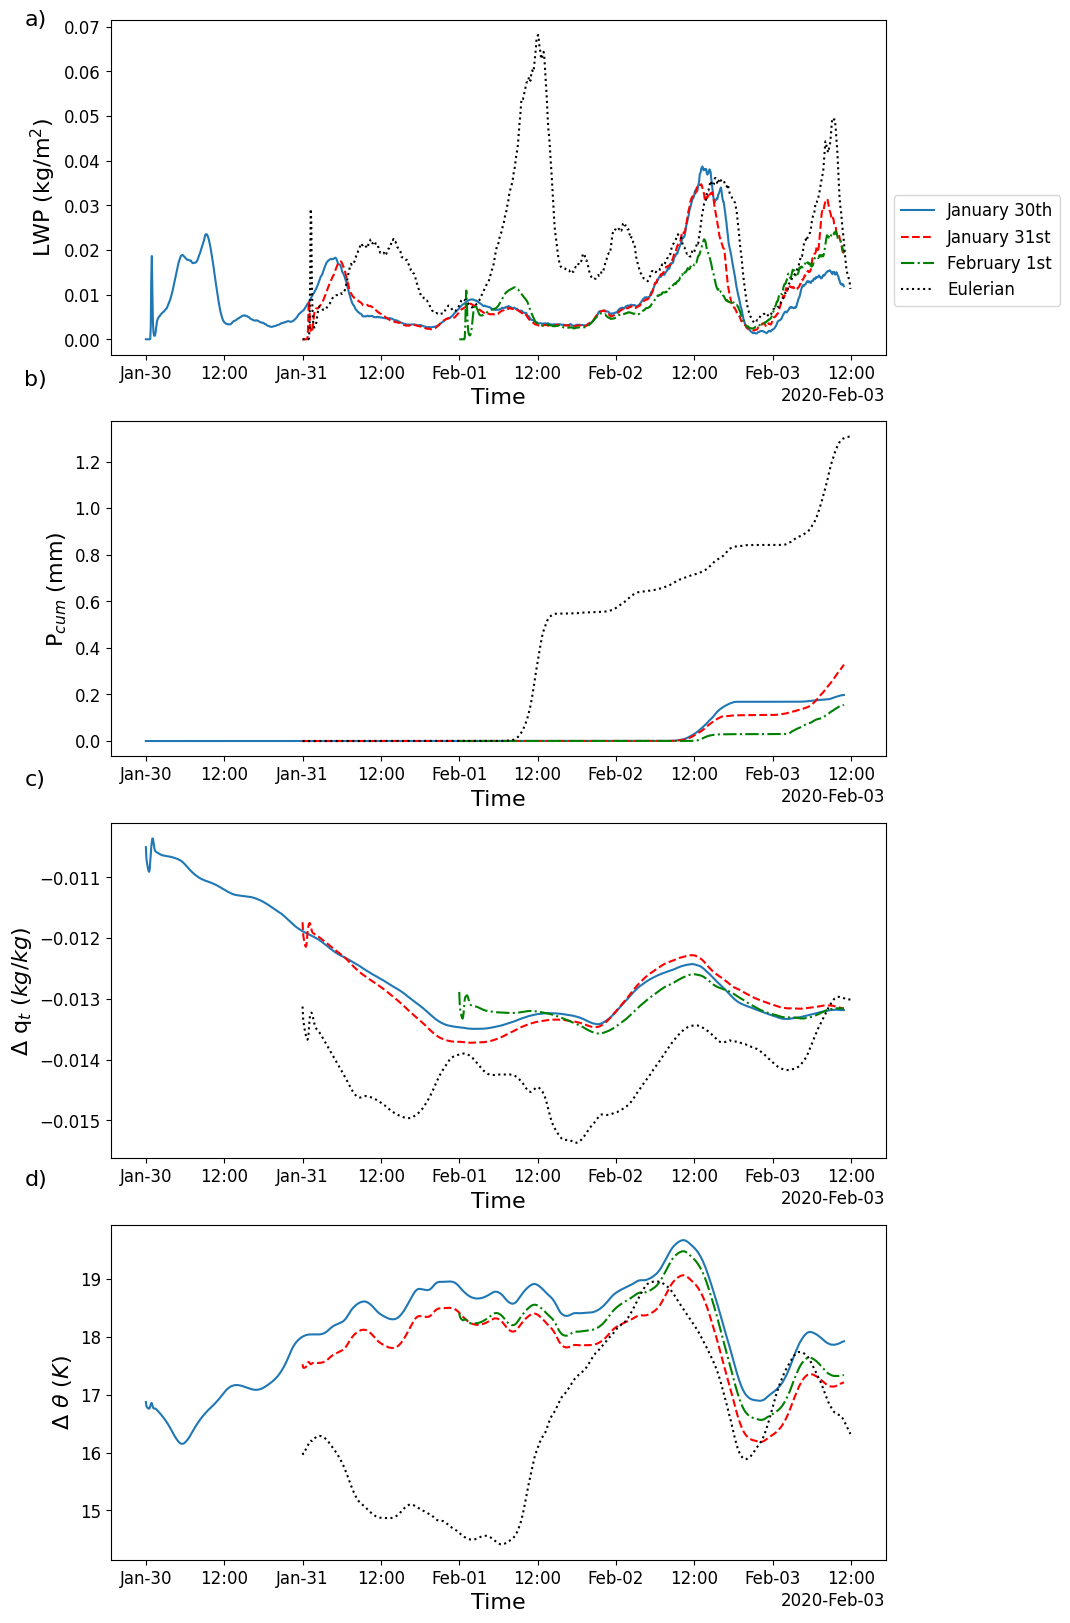

In [3]:
label1='January 30th'
label2='January 31st'
label3='February 1st'

fig, axs = pl.subplots(4, 1, figsize=(10, 20))
pl.subplot(411)
ds1.ql_path.plot.line(x='time',label=label1)
ds5.ql_path.plot.line('r--',x='time',label=label2)
ds7.ql_path.plot.line('g-.',x='time',label=label3)
ds8.ql_path.plot.line('k:',x='time',label='Eulerian')
pl.ylabel(r'LWP (kg/m$^{2}$)')
#pl.xticks([])
#pl.xlabel('')
#pl.show()

pl.subplot(412)
(ds1['rr']*300).cumsum().plot.line(x='time',label=label1)
(ds5['rr']*300).cumsum().plot.line('r--',x='time',label=label2)
(ds7['rr']*300).cumsum().plot.line('g-.',x='time',label=label3)
(ds8['rr']*300).cumsum().plot.line('k:',x='time',label='Eulerian')
pl.ylabel(r'P$_{cum}$ (mm)')
#pl.show()
#pl.xticks([])
#pl.xlabel('')

pl.subplot(413)

#(ds1.qt.sel(z=ds1['z_inv_end']+40)-ds1.qt.sel(z=10)).isel(time=slice(int(48*12),None)).plot.line(x='time',label=label1)
(ds1.qt.sel(z=3200)-ds1.qt.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line(x='time',label=label1)
(ds5.qt.sel(z=3200)-ds5.qt.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('r--',x='time',label=label2)
(ds7.qt.sel(z=3200)-ds7.qt.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('g-.',x='time',label=label3)
(ds8.qt.sel(z=3200)-ds8.qt.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('k:',x='time',label='Eulerian')
pl.ylabel(r'$\Delta$ q$_{t}$ ($kg/kg$)')

pl.subplot(414)

(ds1.thl.sel(z=3200)-ds1.thl.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line(x='time',label=label1)
(ds5.thl.sel(z=3200)-ds5.thl.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('r--',x='time',label=label2)
(ds7.thl.sel(z=3200)-ds7.thl.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('g-.',x='time',label=label3)
(ds8.thl.sel(z=3200)-ds8.thl.sel(z=10)).isel(time=slice(int(0*12),None)).plot.line('k:',x='time',label='Eulerian')
pl.ylabel(r'$\Delta$ $\theta$ ($K$)')
pl.legend(loc='upper left',bbox_to_anchor=(1, 4.1))
pl.figtext(0.05, 0.88, 'a)', ha='center', va='center', fontsize=16)
pl.figtext(0.05, 0.7, 'b)', ha='center', va='center', fontsize=16)
pl.figtext(0.05, 0.5, 'c)', ha='center', va='center', fontsize=16)
pl.figtext(0.05, 0.3, 'd)', ha='center', va='center', fontsize=16)
#pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/Different_Start_Dates.jpg',dpi=300, bbox_inches='tight')

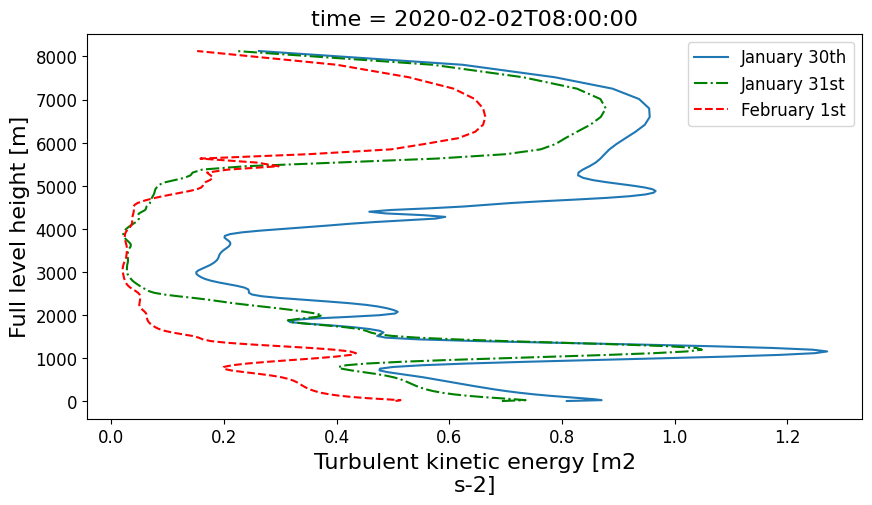

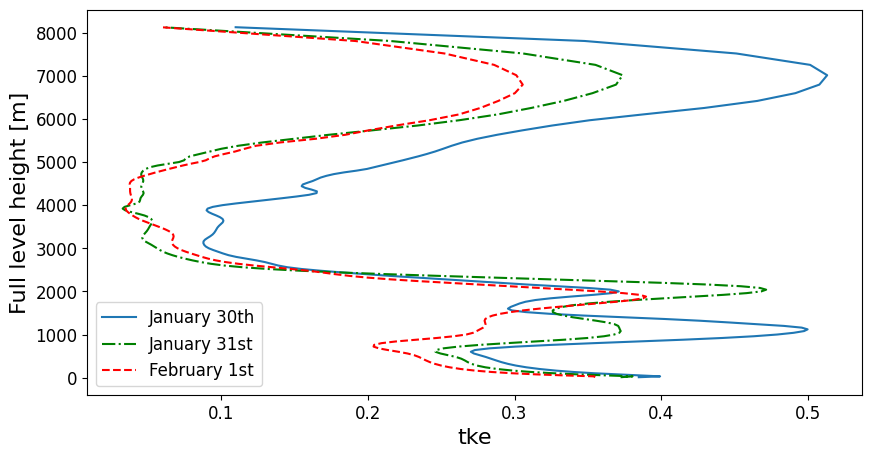

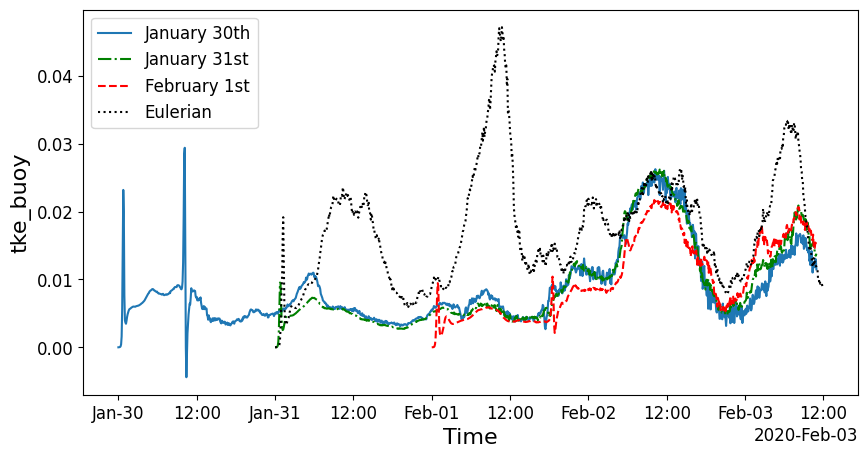

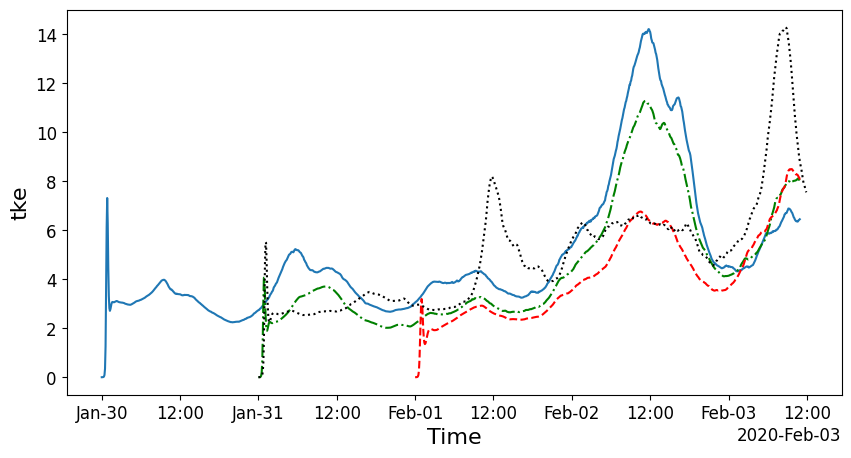

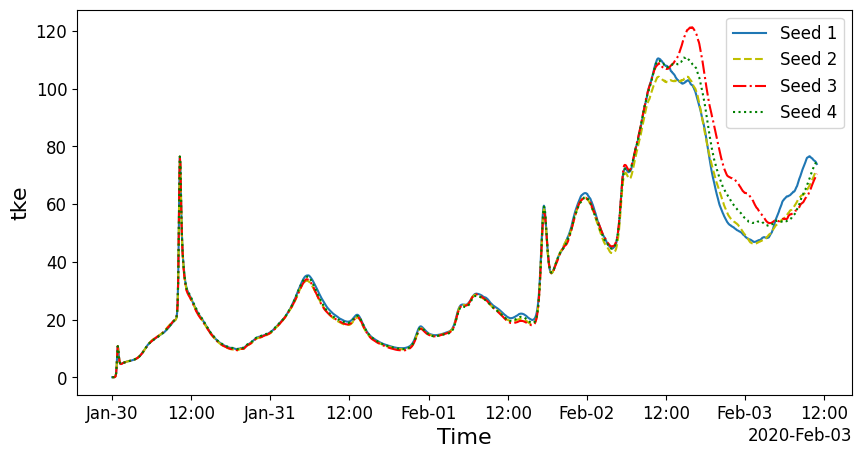

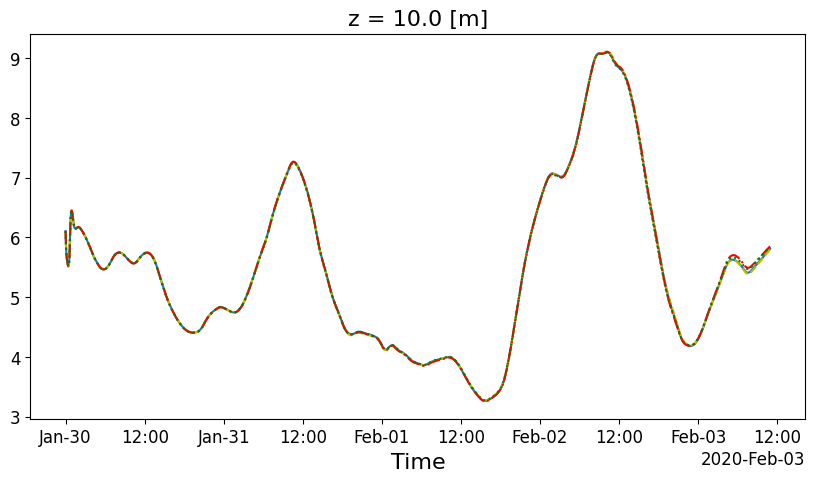

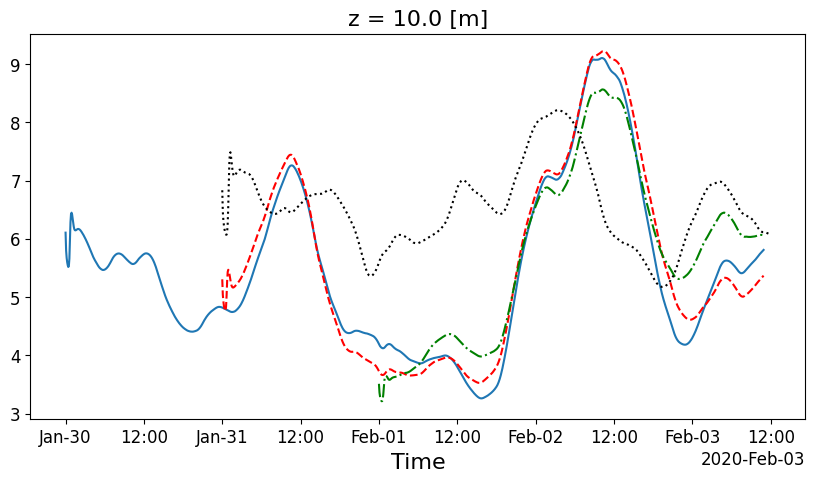

In [4]:

pl.figure(figsize=(10,5))
ds1.tke.sel(time='2020-02-02T08:00:00',method='nearest').plot.line(y='z',label='January 30th')
ds5.tke.sel(time='2020-02-02T08:00:00',method='nearest').plot.line('g-.',y='z',label='January 31st')
ds7.tke.sel(time='2020-02-02T08:00:00',method='nearest').plot.line('r--',y='z',label='February 1st')
pl.legend()

pl.figure(figsize=(10,5))
ds1.tke.mean(dim='time').plot.line(y='z',label='January 30th')
ds5.tke.mean(dim='time').plot.line('g-.',y='z',label='January 31st')
ds7.tke.mean(dim='time').plot.line('r--',y='z',label='February 1st')
pl.legend()


tke=np.concatenate((ds1.tke.sel(z=slice(3200,None).sum(dim='z')).values,ds5.tke.sel(z=slice(3200,None).sum(dim='z')).values,ds7.tke.sel(z=slice(3200,None).sum(dim='z')).values))

pl.figure(figsize=(10,5))




pl.figure(figsize=(10,5))
ds1.tke_buoy.sum('z').plot.line(x='time',label='January 30th')
ds5.tke_buoy.sum('z').plot.line('g-.',x='time',label='January 31st')
ds7.tke_buoy.sum('z').plot.line('r--',x='time',label='February 1st')
ds8.tke_buoy.sum('z').plot.line('k:',x='time',label='Eulerian')
pl.legend()

pl.figure(figsize=(10,5))
ds1.tke.sel(z=slice(0,500)).sum('z').plot.line(x='time',label=label1)
ds5.tke.sel(z=slice(0,500)).sum('z').plot.line('g-.',x='time',label=label2)
ds7.tke.sel(z=slice(0,500)).sum('z').plot.line('r--',x='time',label=label3)
ds8.tke.sel(z=slice(0,500)).sum('z').plot.line('k:',x='time',label='Eulerian')

pl.figure(figsize=(10,5))
ds1.tke.sum('z').plot.line(x='time',label=label1)
ds2.tke.sum('z').plot.line('y--',x='time',label=label2)
ds3.tke.sum('z').plot.line('r-.',x='time',label=label3)
ds4.tke.sum('z').plot.line('g:',x='time',label='Seed 4')
pl.legend()

pl.figure(figsize=(10,5))   
((ds1['u']**2+ds1['v']**2)**(1/2)).isel(z=0).plot.line(x='time',label=label1)
((ds2['u']**2+ds2['v']**2)**(1/2)).isel(z=0).plot.line('y--',x='time',label=label2)
((ds3['u']**2+ds3['v']**2)**(1/2)).isel(z=0).plot.line('r-.',x='time',label=label3)
((ds4['u']**2+ds4['v']**2)**(1/2)).isel(z=0).plot.line('g:',x='time',label='Seed 4')

pl.figure(figsize=(10,5))   
((ds1['u']**2+ds1['v']**2)**(1/2)).isel(z=0).plot.line(x='time',label=label1)
((ds5['u']**2+ds5['v']**2)**(1/2)).isel(z=0).plot.line('r--',x='time',label=label2)
((ds7['u']**2+ds7['v']**2)**(1/2)).isel(z=0).plot.line('g-.',x='time',label=label3)
((ds8['u']**2+ds8['v']**2)**(1/2)).isel(z=0).plot.line('k:',x='time',label='Seed 4')


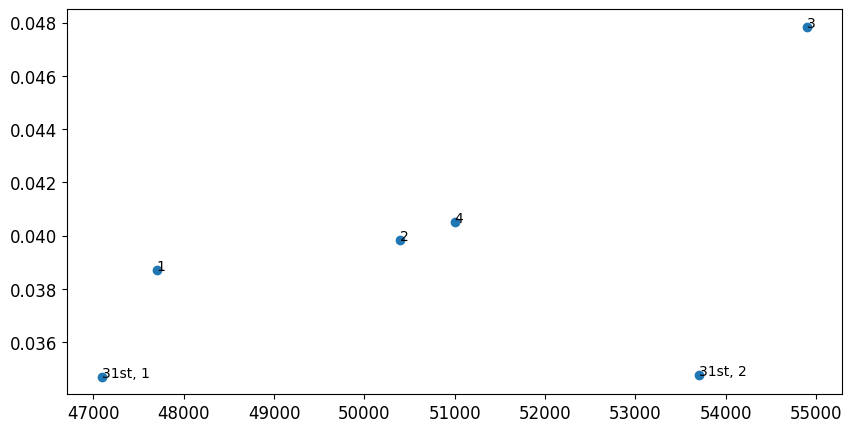

In [4]:
output = {'1':ds1,'2':ds2,'3':ds3,'4':ds4,'5':ds5,'6':ds6}
nc0=['1','2','3','4','31st, 1','31st, 2']

time = np.zeros(6)
peak_ql = np.zeros(6)
i=0
for key in output:
    time[i] = (output[key]['time'].where(output[key]['ql_path']==output[key]['ql_path'].max(),drop=True)-output[key]['time'][0]).dt.seconds.values
    peak_ql[i] = output[key]['ql_path'].max().values
    #time[i+len(nc0)] = (output[key]['time'].where(output[key]['ql_path']==output[key]['ql_path'].isel(time=slice(int(72*3600/300),None)).max(),drop=True)\
    #                    -output[key]['time'][0]).dt.seconds.values + 86400 
    #peak_ql[i+len(nc0)] = output[key]['ql_path'].isel(time=slice(int(72*3600/300),None)).max().values
    i=i+1

fig,ax = pl.subplots(figsize=(10,5))
ax.scatter(time,peak_ql)
for i, txt in enumerate(nc0):
    ax.annotate(txt, (time[i],peak_ql[i]))

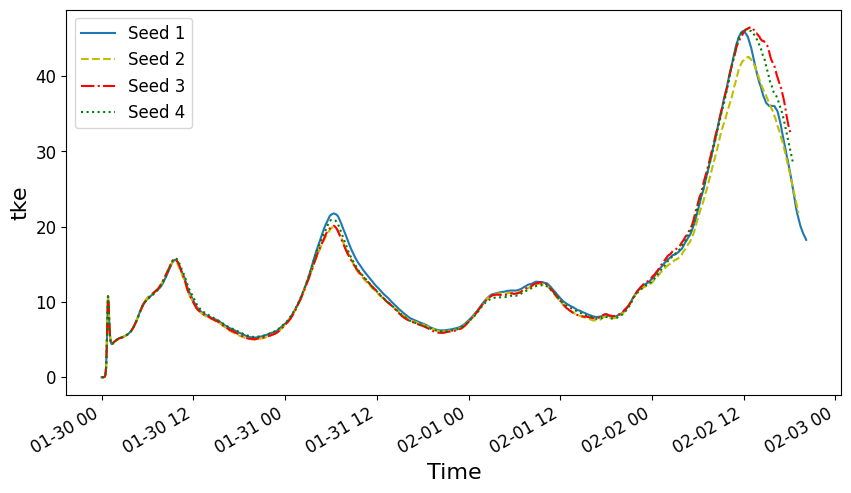

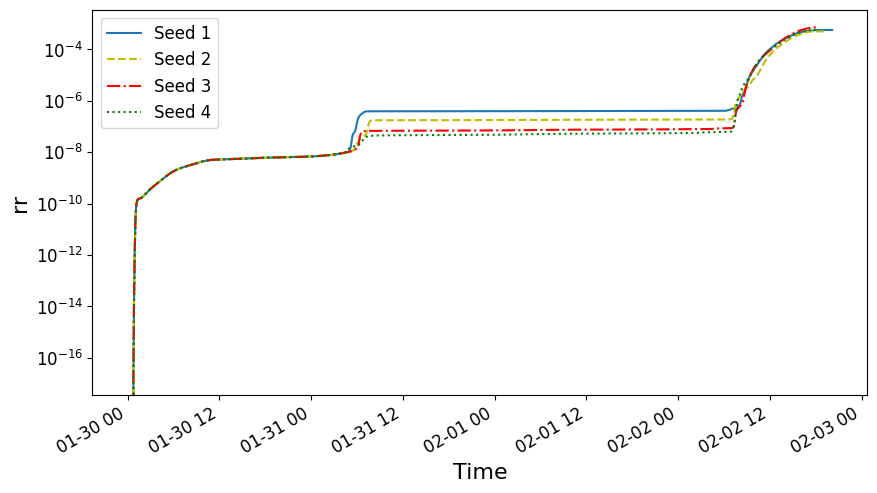

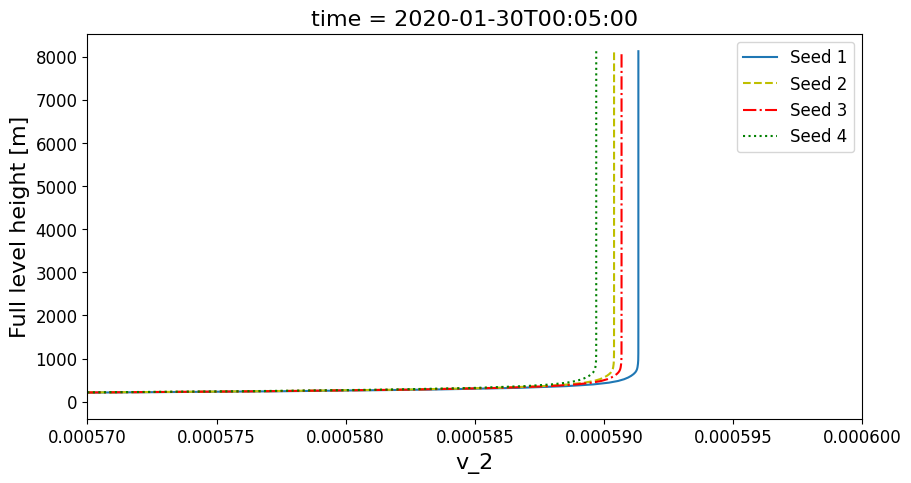

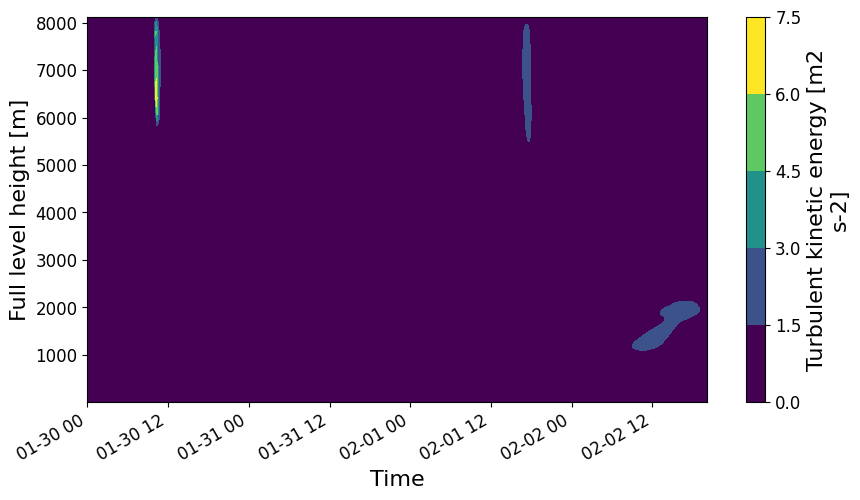

In [2]:
pl.figure(figsize=(10,5))
ds1.sel(z=slice(0,1500)).tke.sum(dim='z').plot.line(x='time',label=label1)
ds2.sel(z=slice(0,1500)).tke.sum(dim='z').plot.line('y--',x='time',label=label2)
ds3.sel(z=slice(0,1500)).tke.sum(dim='z').plot.line('r-.',x='time',label=label3)
ds4.sel(z=slice(0,1500)).tke.sum(dim='z').plot.line('g:',x='time',label='Seed 4')


pl.legend()

pl.figure(figsize=(10,5))
ds1.rr.cumsum().plot.line(x='time',label=label1)
ds2.rr.cumsum().plot.line('y--',x='time',label=label2)
ds3.rr.cumsum().plot.line('r-.',x='time',label=label3)
ds4.rr.cumsum().plot.line('g:',x='time',label='Seed 4')
#set y scale in log
pl.yscale('log')
pl.legend()

pl.figure(figsize=(10,5))
ds1.v_2.isel(time=1).cumsum().plot.line(y='z',label=label1)
ds2.v_2.isel(time=1).cumsum().plot.line('y--',y='z',label=label2)
ds3.v_2.isel(time=1).cumsum().plot.line('r-.',y='z',label=label3)
ds4.v_2.isel(time=1).cumsum().plot.line('g:',y='z',label='Seed 4')
#set y scale in log
pl.legend()
pl.xlim(0.00057,0.0006)

pl.figure(figsize=(10,5))
ds1.tke.plot.contourf(y='z')

In [1]:
print(ds1['z'].isel(z=82).values)
print(ds1['phydro'].isel(z=55,time=0).values)
print(ds1['zi'].isel(time=slice(None,None,12)).values)
def calc_theta(ds):
    ds['th'] = ds['thv']/(1+0.61*(ds['qt']-ds['qlqi'])-ds['ql'])
    #find closest height at which pressure is 700hPa
    z_700 = 3200
    z_850= 1500
    ds['LTS'] = ds['th'].sel(z=z_700,method='nearest')-ds['th'].sel(z=0,method='nearest')
    ds['theta_e'] = ds['th']*np.exp(2.5e6*(ds['qsat']/(1+ds['qsat']))/(1005*ds['T']))
    ds['theta_e'].attrs['units'] = 'K'
    ds['theta_e'].attrs['long_name'] = 'equivalent potential temperature'
    ds['theta_e_grad']=ds['theta_e'].differentiate('z').sel(z=z_850,method='nearest')
    #find the minimum height at which relative humidity is 80%
    ds['lcl']=ds['zi'].copy()
    for i in range(0,len(ds['time'])):
        if ds['ql'].isel(time=i).sum()==0:
            ds['lcl'][i]=z_700
        else:
            ds['lcl'][i] = ds['z'].where((ds['ql'].isel(time=i))>0,drop=True).min()
    ds['EIS'] = ds['LTS']-ds['theta_e_grad']*(z_700 - ds['lcl'])
    return ds
ds1=calc_theta(ds1)
ds5=calc_theta(ds5)
ds6=calc_theta(ds6)
ds7=calc_theta(ds7)

pl.figure(figsize=(10,5))
ds1.EIS.plot.line(x='time',label=label1)
ds5.EIS.plot.line('g--',x='time',label='Jan 31st')
ds6.EIS.plot.line('r-.',x='time',label='Jan 31st, Seed 2')
ds7.EIS.plot.line('y:',x='time',label='Feb 1st')


NameError: name 'ds1' is not defined

[1520. 1560. 1840. 1880. 1920. 2000. 2080. 2200. 2280. 2360. 2400. 2400.
 2440. 2400. 2360. 2280. 2200. 2200. 2160. 2160. 2120. 2080. 2080. 2120.
 2160. 2200. 2200.]


<xarray.Dataset>
Dimensions:               (time: 1284, z: 151, zh: 152, p_rad: 141,
                           era_layers: 140, era_levels: 141)
Coordinates:
  * time                  (time) datetime64[ns] 2020-01-30 ... 2020-02-03T10:...
  * z                     (z) float64 10.0 30.0 52.0 ... 7.807e+03 8.126e+03
  * zh                    (zh) float64 0.0 20.0 41.0 ... 7.966e+03 8.477e+03
  * p_rad                 (p_rad) float64 1.019e+05 9.626e+04 ... 3.71 3.397
Dimensions without coordinates: era_layers, era_levels
Data variables: (12/200)
    iter                  (time) int32 ...
    area                  (time, z) float64 ...
    areah                 (time, zh) float64 ...
    u                     (time, z) float64 ...
    u_3                   (time, z) float64 ...
    u_4                   (time, z) float64 ...
    ...                    ...
    bw_visc               (time, zh) float64 ...
    bw_diss               (time, zh) float64 ...
    bw_rdstr              (time, zh) float64 ...
    bw_buoy               (time, zh) float64 ...
    bw_pres               (time, zh) float64 ...
    z_2d                  (time, z) float64 10.0 30.0 ... 7.807e+03 8.126e+03

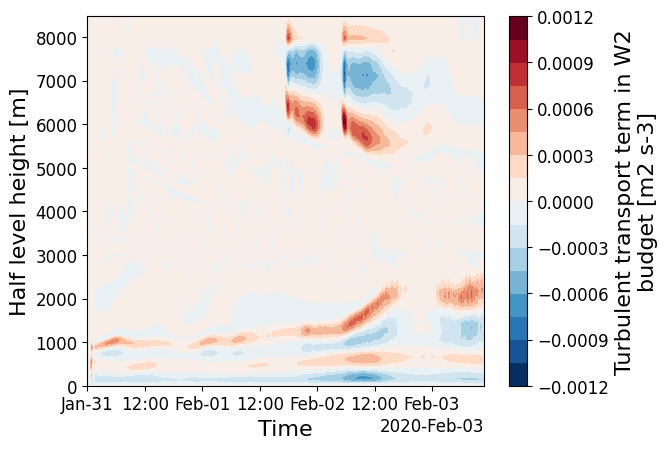

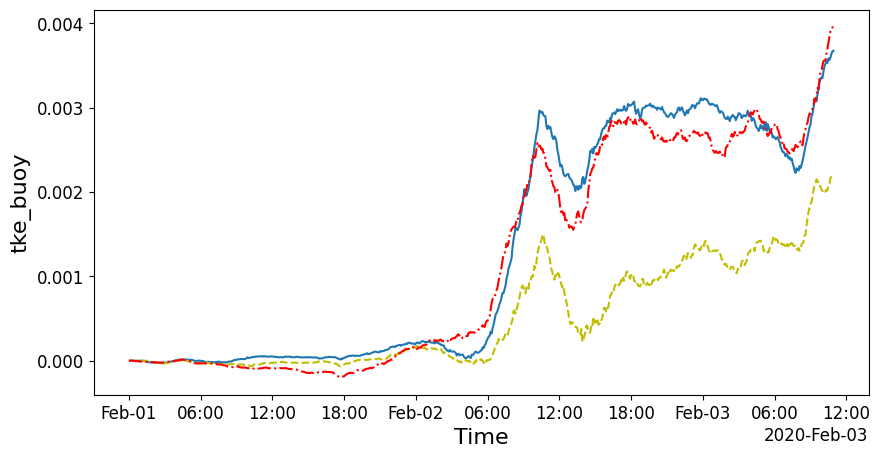

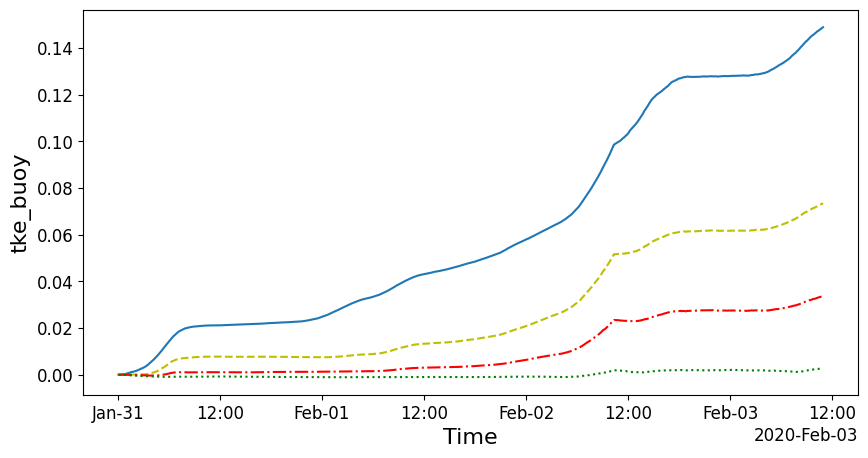

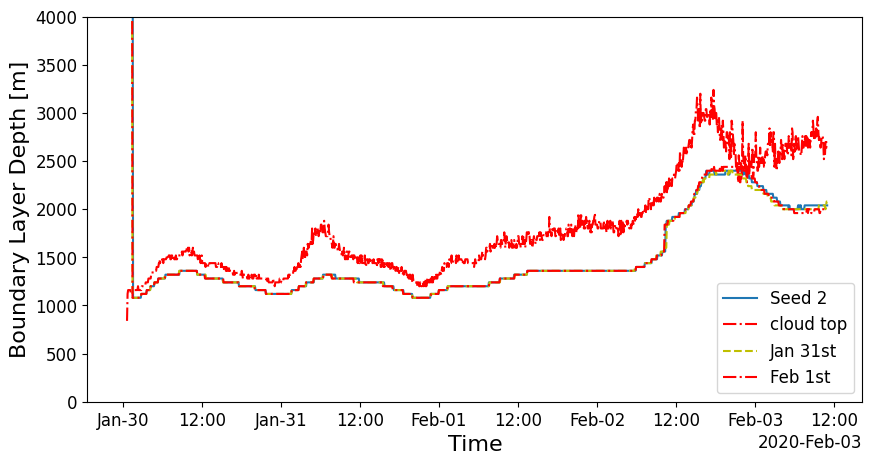

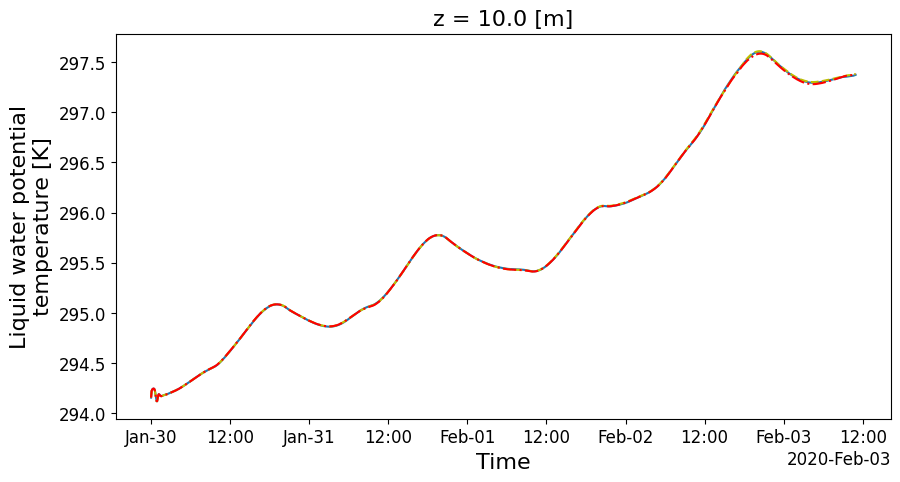

In [15]:
ds5.w2_turb.plot.contourf(x='time',levels=20)
print(ds5['zi'].isel(time=slice(int(56*12),None,12)).values)
pl.figure(figsize=(10,5))
ds1['tke_buoy'].sel(time=slice('2020-02-01',None)).sel(z=(ds1['zi']+330).sel(time=slice('2020-02-01',None)),method='nearest').cumsum(dim='time').plot.line(x='time',label=label1)
#ds2['tke_buoy'].sel(z=ds2['zi']).plot.line('y--',x='time',label=label2)
ds2['tke_buoy'].sel(time=slice('2020-02-01',None)).sel(z=(ds2['zi']+330).sel(time=slice('2020-02-01',None)),method='nearest').cumsum(dim='time').plot.line('y--',x='time',label='Jan 31st')
ds3['tke_buoy'].sel(time=slice('2020-02-01',None)).sel(z=(ds3['zi']+330).sel(time=slice('2020-02-01',None)),method='nearest').cumsum(dim='time').plot.line('r-.',x='time',label='Jan 31st, Seed 2')


pl.figure(figsize=(10,5))
ds1['tke_buoy'].sel(time=slice('2020-01-31',None)).sel(z=(ds1['zi']+0).sel(time=slice('2020-01-31',None)),method='nearest').cumsum(dim='time').plot.line(x='time',label=label1)
#ds2['tke_buoy'].sel(z=ds2['zi']).plot.line('y--',x='time',label=label2)
ds1['tke_buoy'].sel(time=slice('2020-01-31',None)).sel(z=(ds1['zi']+100).sel(time=slice('2020-01-31',None)),method='nearest').cumsum(dim='time').plot.line('y--',x='time',label='Jan 31st')
ds1['tke_buoy'].sel(time=slice('2020-01-31',None)).sel(z=(ds1['zi']+200).sel(time=slice('2020-01-31',None)),method='nearest').cumsum(dim='time').plot.line('r-.',x='time',label='Jan 31st, Seed 2')
ds1['tke_buoy'].sel(time=slice('2020-01-31',None)).sel(z=(ds1['zi']+300).sel(time=slice('2020-01-31',None)),method='nearest').cumsum(dim='time').plot.line('g:',x='time',label='Jan 31st, Seed 3')

#pl.figure(figsize=(10,5))
#ds1['qt'].sel(time=slice(None,None)).\
#    sel(z=slice((ds1['zi'])+0,(ds1['zi'])+0))\
#        .sum(dim='z').plot.line(x='time',label=label1)

pl.figure(figsize=(10,5))
ds1['zi'].plot.line(x='time',label=label1)
ds1['z_2d']=ds1['ql'].copy()
ds1['z_2d'][:]=ds1['z']
ds1['z_2d'].where(ds1['ql']>0,drop=True).max(dim='z').plot.line('r-.',x='time',label='cloud top')
 
#find cloud top

ds2['zi'].plot.line('y--',x='time',label='Jan 31st')
ds3['zi'].plot.line('r-.',x='time',label='Feb 1st')
pl.ylim(0,4000)
pl.legend()

pl.figure(figsize=(10,5))

ds1.thl.isel(z=0).plot.line(x='time',label=label1)
ds2.thl.isel(z=0).plot.line('y--',x='time',label=label2)
ds3.thl.isel(z=0).plot.line('r-.',x='time',label=label3)

ds1

<Figure size 1000x500 with 0 Axes>

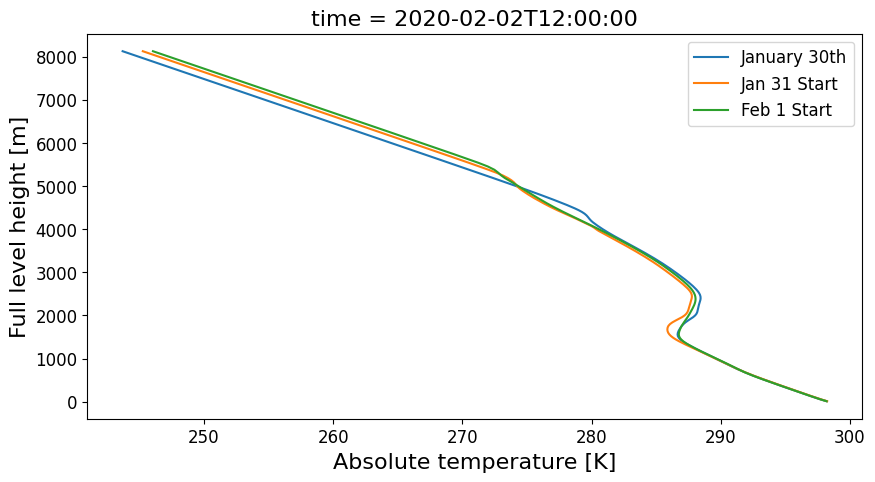

<Figure size 1000x500 with 0 Axes>

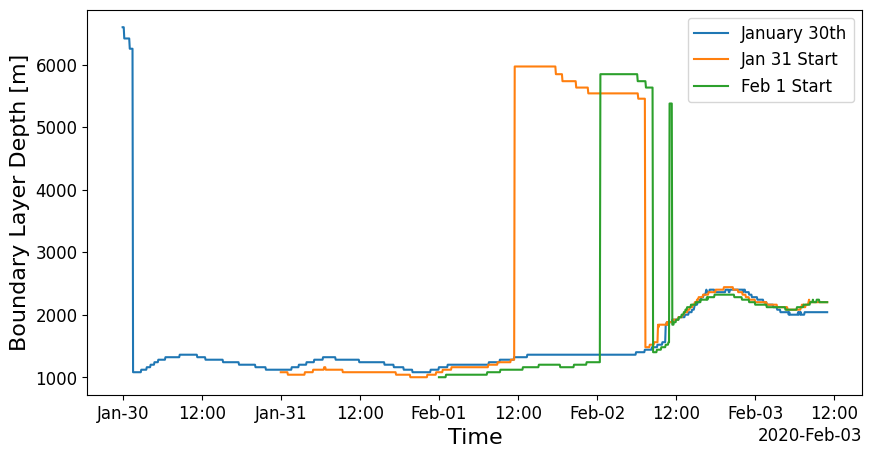

<Figure size 1000x500 with 0 Axes>

In [12]:
pl.figure(figsize=(10,5))
ds1.T.sel(time='2020-02-02T12:00',method='nearest').plot.line(y='z',label=label1)
ds5.T.sel(time='2020-02-02T12:00',method='nearest').plot.line(y='z',label='Jan 31 Start')
ds7.T.sel(time='2020-02-02T12:00',method='nearest').plot.line(y='z',label='Feb 1 Start')
#eulerian.T.sel(time='2020-02-02T00:00',method='nearest').plot.line(y='z',label='Eulerian')
pl.legend()
pl.figure(figsize=(10,5))

pl.figure(figsize=(10,5))
ds1.zi.plot.line(x='time',label=label1)
ds5.zi.plot.line(x='time',label='Jan 31 Start')
ds7.zi.plot.line(x='time',label='Feb 1 Start')
#eulerian.T.sel(time='2020-02-02T00:00',method='nearest').plot.line(y='z',label='Eulerian')
pl.legend()
pl.figure(figsize=(10,5))